Phishing URL Detection: Data Preprocessing

--------------------------------------------------------------------------------------------------------------------------------------------------

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [131]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [132]:
# Fetch and display data from dataset 
df = pd.read_csv("phishing_dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1


In [133]:
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,skincareliving,100.0,100.0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,winchestergov,0.0,0.0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,nononsensedesign,100.0,100.0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,patient-cell-40f5updatedlogmyloginworkers,0.0,0.0,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,0.060596,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,1038,3346,1,alternativefinland,100.0,100.0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,21,6,18,256,0,261,1


In [134]:
# Display shape and basic info
print("Dataset shape : ",df.shape)
print("Dataset length :",len(df))
print("Target columns values (label) : ", df['label'].unique())

Dataset shape :  (235795, 56)
Dataset length : 235795
Target columns values (label) :  [1 0]


In [135]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [136]:
# Checking for null values
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [137]:
# Dispaly basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [138]:
# Display the statitical info
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,2.357950e+05,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,0.024861,0.000138,19.428919,0.515946,1.881011,0.028616,0.062241,0.029403,0.025056,2.340198,0.063309,0.782625,1141.900443,1.278953e+04,0.861261,50.131427,52.122098,0.361768,0.266541,0.624513,0.133438,0.040107,0.440183,0.221765,1.588638,0.043987,0.456570,0.414301,0.377799,0.102263,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,1.876249,0.003817,29.090330,0.123315,11.886695,0.070897,0.934704,0.193505,0.836448,3.527603,0.032393,0.412461,3419.950513,1.522011e+05,0.345675,49.676981,49.600564,0.480513,0.442151,0.484249,0.340048,0.196210,0.496410,3.870540,5.762561,0.205067,0.498111,0.492602,0.484838,0.302994,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,1.000000,18.000000,2.000000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.519000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,429.000000,1.090000e+03,1.000000,75.000000,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.594000,0.000000,0.000000,0.000000,0.000000,0.000

In [139]:
# Display the columns in the dataset
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [140]:
# Filter unnecessary columns that to be dropped
category_columns = ["FILENAME", "URL", "Domain", "Title"]
df[category_columns].nunique()

FILENAME    235795
URL         235370
Domain      220086
Title       197874
dtype: int64

In [141]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=category_columns,axis=1)
print(f"New shape: {df_cleaned.shape}")

New shape: (235795, 52)


In [142]:
df_cleaned.head(10)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1
5,30,23,0,org,100.0,1.000000,0.079963,0.060614,3,1,0,0,0.0,17,0.567,0,0.0,0,0,0,1,0.033,1,1210,737,1,0.000000,0.000000,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1,35,1,11,86,0,14,1
6,25,18,0,com,100.0,1.000000,0.522907,0.063549,3,1,0,0,0.0,12,0.480,0,0.0,0,0,0,1,0.040,1,1024,984,1,0.000000,0.000000,1,0,1,1,1,0,2,4,0,1,0,1,0,0,0,0,1,32,4,14,44,2,17,1
7,25,18,0,com,100.0,1.000000,0.522907,0.060486,3,1,0,0,0.0,12,0.480,0,0.0,0,0,0,1,0.040,1,514,399,1,100.000000,100.000000,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,24,2,22,36,0,15,1
8,29,22,0,in,100.0,1.000000,0.005084,0.056980,2,1,0,0,0.0,16,0.552,0,0.0,0,0,0,1,0.034,1,2371,12913,1,100.000000,100.000000,0,1,1,0,0,1,0,0,0,1,1,1,1,0,0,0,1,71,4,9,40,1,317,1
9,18,11,0,org,100.0,1.000000,0.079963,0.070497,3,1,0,0,0.0,5,0.278,0,0.0,0,0,0,1,0.056,1,2730,481,1,0.000000,0.000000,1,1,1,0,0,1,0,2,0,1,0,0,0,0,0,0,1,10,1,12,173,6,65,1


In [143]:
# Filtering the numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
# No.of rows needed in the subplot and calculate the num of rows needed.
plots_per_row = 3
num_rows = (len(numerical_cols) + plots_per_row - 1) // plots_per_row

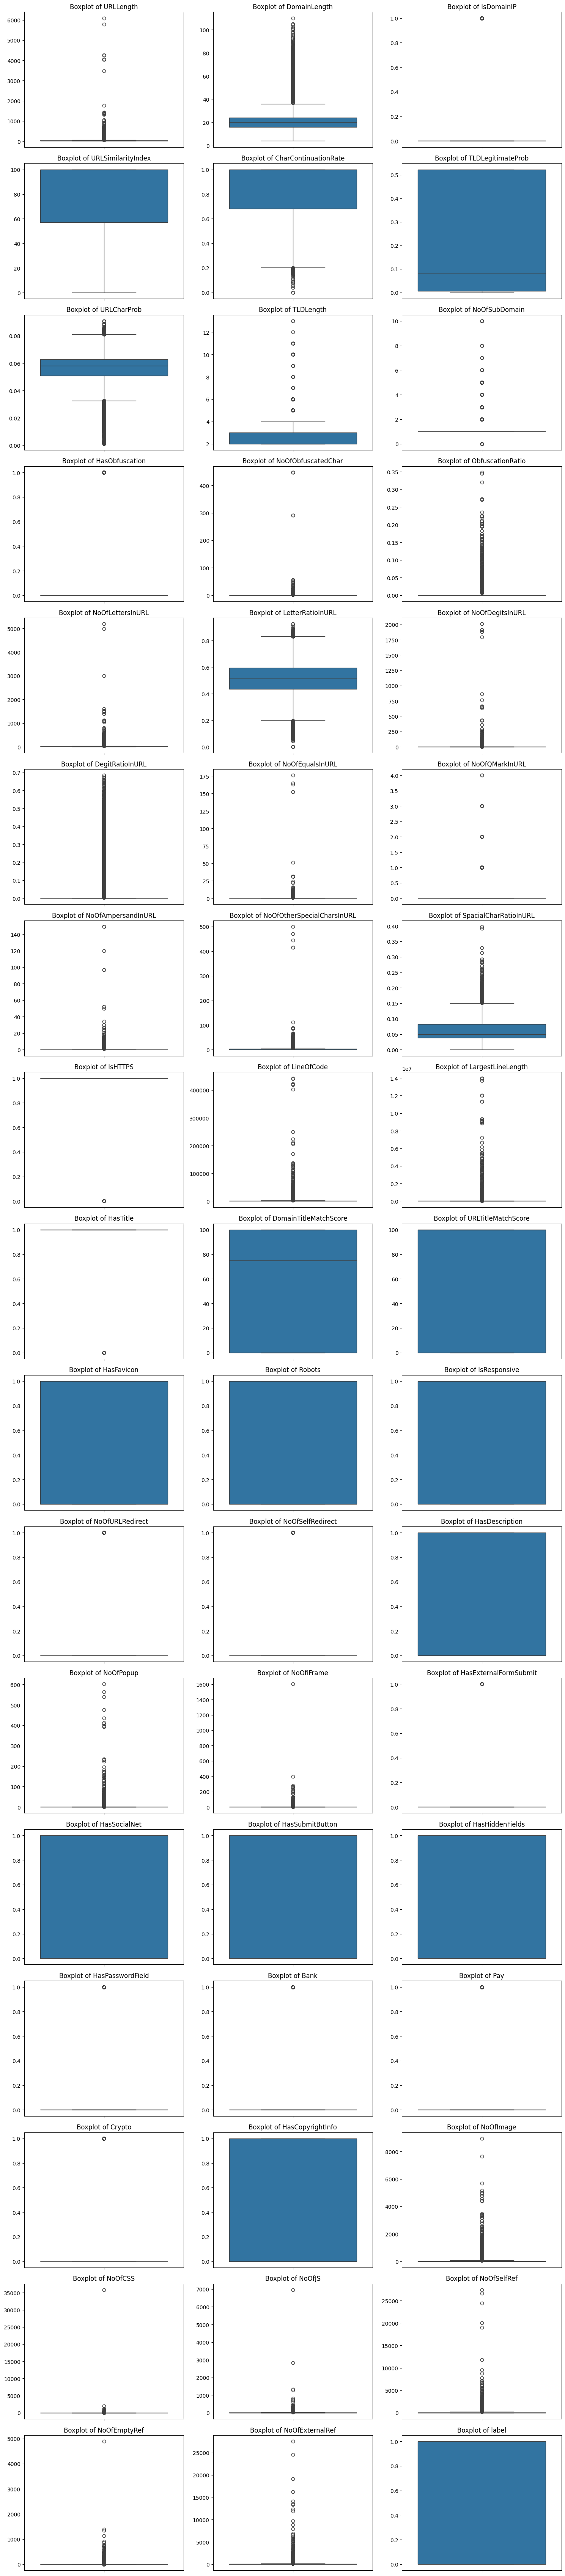

In [144]:
# Checking for outliers
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
 
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [145]:
for col in numerical_cols:
    # Calculate IQR for this column
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the outliers
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

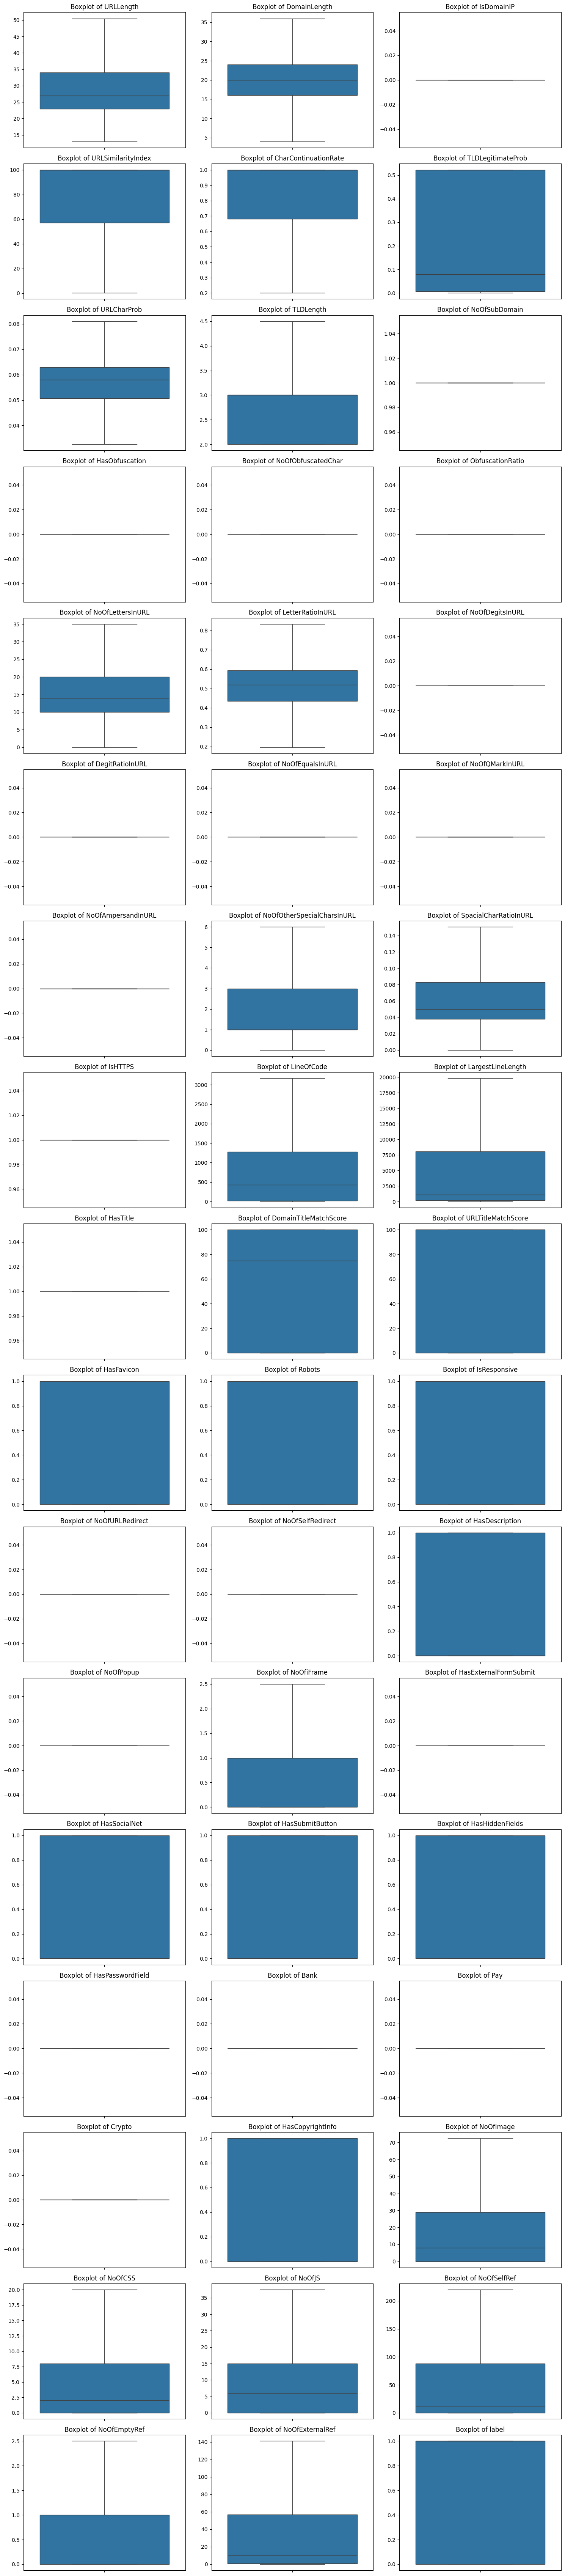

In [146]:
# visualise box plot to check outliers
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
 
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [147]:
# Display no.of unique values in 'TLD' column
df_cleaned['TLD'].nunique()

695

In [148]:
# Separate features and target variable
X = df_cleaned.drop('label', axis=1)
y = df_cleaned['label']

print("Features (X) and target (y) have been separated.")

Features (X) and target (y) have been separated.


In [149]:
# Display X
X.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31.0,24,0,com,100.0,1.000000,0.522907,0.061933,3.0,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558.0,9381.0,1,0.000000,0.000000,0,1,1,0,0,0,0,1.0,0,0,1,1,0,0,0,0,1,34.0,20,28.0,119,0.0,124
1,23.0,16,0,de,100.0,0.666667,0.032650,0.050207,2.0,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618.0,9381.0,1,55.555556,55.555556,1,1,0,0,0,0,0,0.0,0,1,1,0,0,0,0,0,1,50.0,9,8.0,39,0.0,141
2,29.0,22,0,uk,100.0,0.866667,0.028555,0.064129,2.0,1,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467.0,682.0,1,46.666667,46.666667,0,1,1,0,0,1,0,0.0,0,0,1,1,0,0,0,0,1,10.0,2,7.0,42,2.0,5
3,26.0,19,0,com,100.0,1.000000,0.522907,0.057606,3.0,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,3165.5,19817.5,1,0.000000,0.000000,0,1,1,0,0,0,0,2.5,0,1,1,1,0,0,0,0,1,3.0,20,15.0,22,1.0,31
4,33.0,26,0,org,100.0,1.000000,0.079963,0.059441,3.0,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,3165.5,19817.5,1,100.000000,100.000000,0,1,1,0,0,1,0,2.0,0,1,1,1,0,0,0,0,1,72.5,15,34.0,72,1.0,85


In [150]:
# Display y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [151]:
X['TLD'].value_counts()

TLD
com           112554
org            18793
net             7097
app             6508
uk              6395
               ...  
15                 1
nr                 1
parts              1
kitchen            1
associates         1
Name: count, Length: 695, dtype: int64

In [152]:
tld_counts = X['TLD'].value_counts()
rare_tlds = tld_counts[tld_counts < 10].index

X_processed = X.copy()
X_processed['TLD'] = X['TLD'].replace(rare_tlds, 'Other')

print(f"Number of unique TLDs before grouping: {len(X['TLD'].unique())}")
print(f"Number of unique TLDs after grouping: {len(X_processed['TLD'].unique())}")

Number of unique TLDs before grouping: 695
Number of unique TLDs after grouping: 288


In [153]:
X_processed['TLD'].value_counts()

TLD
com       112554
org        18793
net         7097
app         6508
uk          6395
           ...  
health        10
ad            10
church        10
bm            10
tools         10
Name: count, Length: 288, dtype: int64

In [158]:
X_processed.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31.0,24,0,com,100.0,1.000000,0.522907,0.061933,3.0,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558.0,9381.0,1,0.000000,0.000000,0,1,1,0,0,0,0,1.0,0,0,1,1,0,0,0,0,1,34.0,20,28.0,119,0.0,124
1,23.0,16,0,de,100.0,0.666667,0.032650,0.050207,2.0,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618.0,9381.0,1,55.555556,55.555556,1,1,0,0,0,0,0,0.0,0,1,1,0,0,0,0,0,1,50.0,9,8.0,39,0.0,141
2,29.0,22,0,uk,100.0,0.866667,0.028555,0.064129,2.0,1,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467.0,682.0,1,46.666667,46.666667,0,1,1,0,0,1,0,0.0,0,0,1,1,0,0,0,0,1,10.0,2,7.0,42,2.0,5
3,26.0,19,0,com,100.0,1.000000,0.522907,0.057606,3.0,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,3165.5,19817.5,1,0.000000,0.000000,0,1,1,0,0,0,0,2.5,0,1,1,1,0,0,0,0,1,3.0,20,15.0,22,1.0,31
4,33.0,26,0,org,100.0,1.000000,0.079963,0.059441,3.0,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,3165.5,19817.5,1,100.000000,100.000000,0,1,1,0,0,1,0,2.0,0,1,1,1,0,0,0,0,1,72.5,15,34.0,72,1.0,85


In [155]:
# Performing one hot encoding
X_encoded = pd.get_dummies(X_processed, columns=['TLD'], drop_first=True)

print("\nCategorical features have been grouped and one-hot encoded.")
print(f"Shape of X after encoding: {X_encoded.shape}")


Categorical features have been grouped and one-hot encoded.
Shape of X after encoding: (235795, 337)


In [156]:
# Split into train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (188636, 337)
Testing set shape: (47159, 337)


In [157]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")



Feature scaling complete.


------------------------------------------------------------------------------------------------------------------------------------------------

Data is now preprocessed and ready for model training.

-------------------------------------------------------------------------------------------------------------------------------------------------
